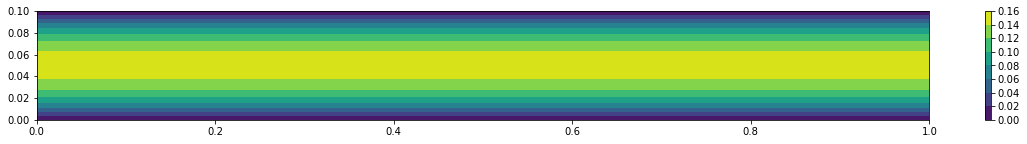

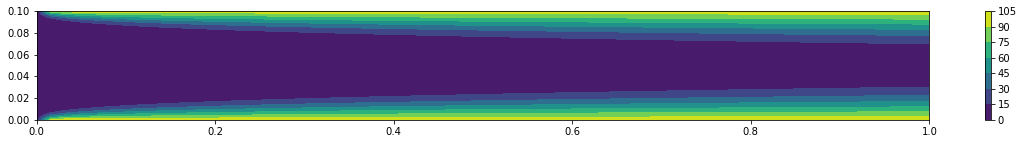

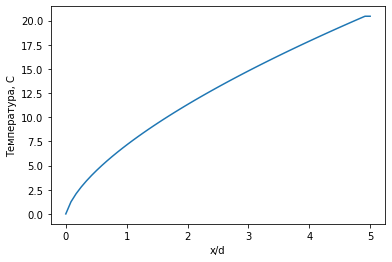

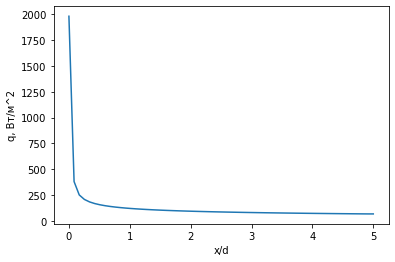

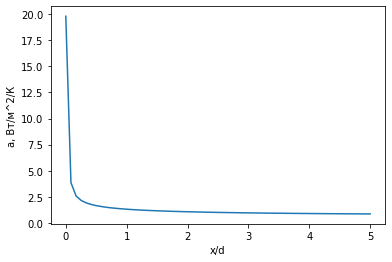

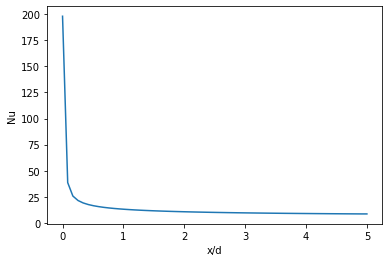

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T0 = 0
Tc = 100

u0 = 0.1

h = 0.1
l = 1

nx = 60
ny = 100
dx = l / (nx - 1)
dy = h / (ny - 1)

ro = 1
cp = 1000
lamda = 0.02
a = lamda / ro / cp

X = np.linspace(0, l, nx)
Y = np.linspace(0, h, ny)
xx, yy = np.meshgrid(X, Y)
T = np.zeros((ny, nx))
U = 1.5 * u0 * (1 - ((0.5 * h - yy) / 0.5 / h) ** 2)
A = np.zeros((ny * nx, ny * nx))
B = np.zeros(nx * ny)

for i in range(0, nx):
    A[i, i] = 1
    B[i] = Tc
    A[nx * ny - i - 1, nx * ny - i - 1] = 1
    B[nx * ny - i - 1] = Tc

for i in range(0, ny):
    A[i * nx, i * nx] = 1
    B[i * nx] = T0
    if i != 0 and i != ny - 1:
        A[i * nx + nx - 1, i * nx + nx - 1] = -1
        A[i * nx + nx - 1, i * nx + nx - 2] = 1
        B[i * nx + nx - 1] = 0

for i in range(1, ny - 1):
    for j in range(1, nx - 1):
        A[i * nx + j, i * nx + j] = -1 * U[i, j] * dy - 2 * a * dy / dx - 2 * a * dx / dy  # 0.5*U[i,j-1]*dy-0.5*U[i,j+1]*dy-2*a*dy/dx-2*a*dx/dy#
        A[i * nx + j, i * nx + j + 1] = a * dy / dx  # a*dy/dx-0.5*U[i,j+1]*dy#
        A[i * nx + j, i * nx + j - 1] = a * dy / dx + U[i, j - 1] * dy  # a*dy/dx+0.5*U[i,j-1]*dy
        A[i * nx + j, i * nx + j + nx] = a * dx / dy
        A[i * nx + j, i * nx + j - nx] = a * dx / dy

t = np.linalg.solve(A, B)
for i in range(0, ny):
    for j in range(0, nx):
        T[i, j] = t[i * nx + j]

plt.figure(figsize=(20, 2))
plt.contourf(X, Y, U)
plt.colorbar()
plt.show()

plt.figure(figsize=(20, 2))
plt.contourf(X, Y, T)
plt.colorbar()
plt.show()

Tav = np.zeros(nx)
qc = np.zeros(nx)
alph = np.zeros(nx)
Nu = np.zeros(nx)

for i in range(0, nx):
    for j in range(0, ny):
        Tav[i] += T[j, i] * U[j, i] * dy
    Tav[i] = Tav[i] / u0 / h
    qc[i] = (Tc - T[1, i]) / dy * lamda
    alph[i] = qc[i] / (Tc - Tav[i])
    Nu[i] = alph[i] * 2 * h / lamda

plt.plot(X / 2 / h, Tav)
plt.ylabel('Температура, C')
plt.xlabel('x/d')
plt.show()

plt.plot(X / 2 / h, qc)
plt.xlabel('x/d')
plt.ylabel('q, Вт/м^2')
plt.show()

plt.plot(X / 2 / h, alph)
plt.ylabel('a, Вт/м^2/К')
plt.xlabel('x/d')
plt.show()

plt.plot(X / 2 / h, Nu)
plt.xlabel('x/d')
plt.ylabel('Nu')
plt.show()